In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
x = np.arange(0.01, 1, 0.01)
y = -np.log(x)

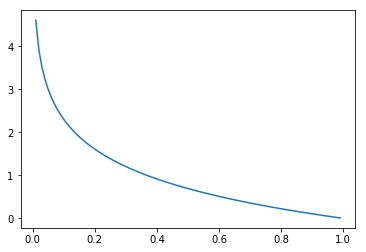

In [19]:
plt.plot(x, y)
plt.show()

In [6]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

最小自乗
$$ E=\frac{1}{2} \sum_{k} (y_k −t_k)^2  $$
クロスエントロピー関数
$$ E= - \sum_k t_k \log y_k $$

In [52]:
def mean_squared_error(y, t):
         return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    delta = 1e-7
    return -1 * np.sum(t * np.log(y + delta))

In [15]:
mean_squared_error(y, t)

0.097500000000000031

In [16]:
cross_entropy_error(y, t)

0.51082545709933802

$$ E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk} $$

In [18]:
import sys
sys.path.append('../deep-learning-from-scratch/')
from dataset.mnist import load_mnist

In [19]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [43]:
import pickle
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, one_hot_label=True)
    return x_train, t_train
def init_network():
    with open("../deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [44]:
x, t = get_data()
y = predict(init_network(), x)

In [54]:
cross_entropy_error(y, t) / len(y)

12.093386222012837

In [48]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [49]:
np.random.choice(60000, 10)

array([16995, 18032,  8793, 16216, 56657, 46323, 45998, 13046, 18207, 17282])

In [51]:
def cross_entropy_error2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [53]:
cross_entropy_error2(y, t)

12.199955128161113

# 4.3

In [2]:
def numerical_diff_wrong(f, x):
        h = 10e-50
        return (f(x+h) - f(x)) / h

def numerical_diff(f, x):
        h = 1e-4 # 0.0001
        return (f(x+h) - f(x-h)) / (2*h)

$ y = 0.01x^2 + 0.1x $

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

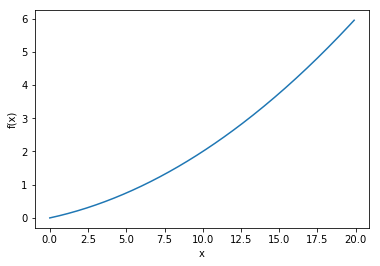

In [4]:
x = np.arange(0.0, 20.0, 0.1) # 0 から 20 まで、0.1 刻みの x 配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


$ f(x_0, x_1)=x^2_0 +x^2_1 $ 

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2
# または return np.sum(x**2)

In [11]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [12]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4

In [1]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x と同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

In [5]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]
